In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# # Load the dataset
eda_data_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/eda_data.csv')
glassdoor_jobs_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/glassdoor_jobs.csv')
salary_data_cleaned_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/salary_data_cleaned.csv')

# salary_data_cleaned_df = pd.read_csv('salary_data_cleaned.csv')

# Cleaning and Preprocessing

In [ ]:
salary = salary_data_cleaned_df

In [ ]:
job_description = salary[['Job Description', 'avg_salary']]
job_description

,Job Description,avg_salary
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",72.0
1,What You Will Do:\n\nI. General Summary\n\nThe...,87.5
2,"KnowBe4, Inc. is a high growth information sec...",85.0
3,*Organization and Job ID**\nJob ID: 310709\n\n...,76.5
4,Data Scientist\nAffinity Solutions / Marketing...,114.5
...,...,...
737,Site Name: USA - Massachusetts - Cambridge\nPo...,84.5
738,THE CHALLENGE\nEventbrite has a world-class da...,102.5
739,The Auton Lab at Carnegie Mellon University is...,73.5
740,Data Science ManagerResponsibilities:\n\nOvers...,127.5


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk, re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

stemmer = PorterStemmer()
words = stopwords.words("english")
#job_description['cleaned']
salary['Cleaned Job Description'] = job_description['Job Description']\
.apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(salary['Cleaned Job Description']).toarray()
final_features.shape

(742, 28688)

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                742 non-null    object 
 1   Salary Estimate          742 non-null    object 
 2   Job Description          742 non-null    object 
 3   Rating                   742 non-null    float64
 4   Company Name             742 non-null    object 
 5   Location                 742 non-null    object 
 6   Headquarters             742 non-null    object 
 7   Size                     742 non-null    object 
 8   Founded                  742 non-null    int64  
 9   Type of ownership        742 non-null    object 
 10  Industry                 742 non-null    object 
 11  Sector                   742 non-null    object 
 12  Revenue                  742 non-null    object 
 13  Competitors              742 non-null    object 
 14  hourly                   7

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression


In [ ]:
# Separate the features and the target variable
X = salary.drop(columns=['avg_salary'])
y = salary['avg_salary']

In [ ]:
# Drop repeated features
X = X.drop(columns=['Salary Estimate', 'Job Description'])

In [ ]:
! pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 1.9 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
# Define the categorical columns that need to be one-hot encoded
cat_cols = ['job_state','Headquarters','Location','Size', 'Job Title', 'Company Name', 
            'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 
            'company_txt', 'Cleaned Job Description']
te = ce.TargetEncoder (cols = cat_cols)
te.fit(X , y)
df_encoded = te.transform(X)

In [ ]:
df_encoded.head()

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,Cleaned Job Description
0,106.179305,3.8,96.901524,96.564705,96.901524,90.753842,1973,101.776829,99.651233,99.651233,...,96.901524,96.564705,0,47,1,0,0,0,1,96.901524
1,98.918206,3.4,98.918206,98.918206,97.782204,112.230575,1984,97.053845,69.343702,69.343702,...,98.918206,97.953468,0,36,1,0,0,0,0,98.918206
2,106.179305,4.8,95.985349,95.985349,95.985349,90.753842,2010,101.776829,99.099869,97.702355,...,95.985349,91.395421,1,10,1,0,1,0,1,98.409445
3,106.179305,3.8,96.974859,94.177868,95.381099,92.916684,1965,94.462278,93.481831,93.481831,...,96.974859,96.722510,1,55,1,0,0,0,0,97.203710
4,106.179305,2.9,102.717572,103.062780,100.403309,111.344512,1998,101.776829,102.912920,97.702355,...,102.717572,98.663604,1,22,1,0,0,0,1,102.431134


<Axes: >

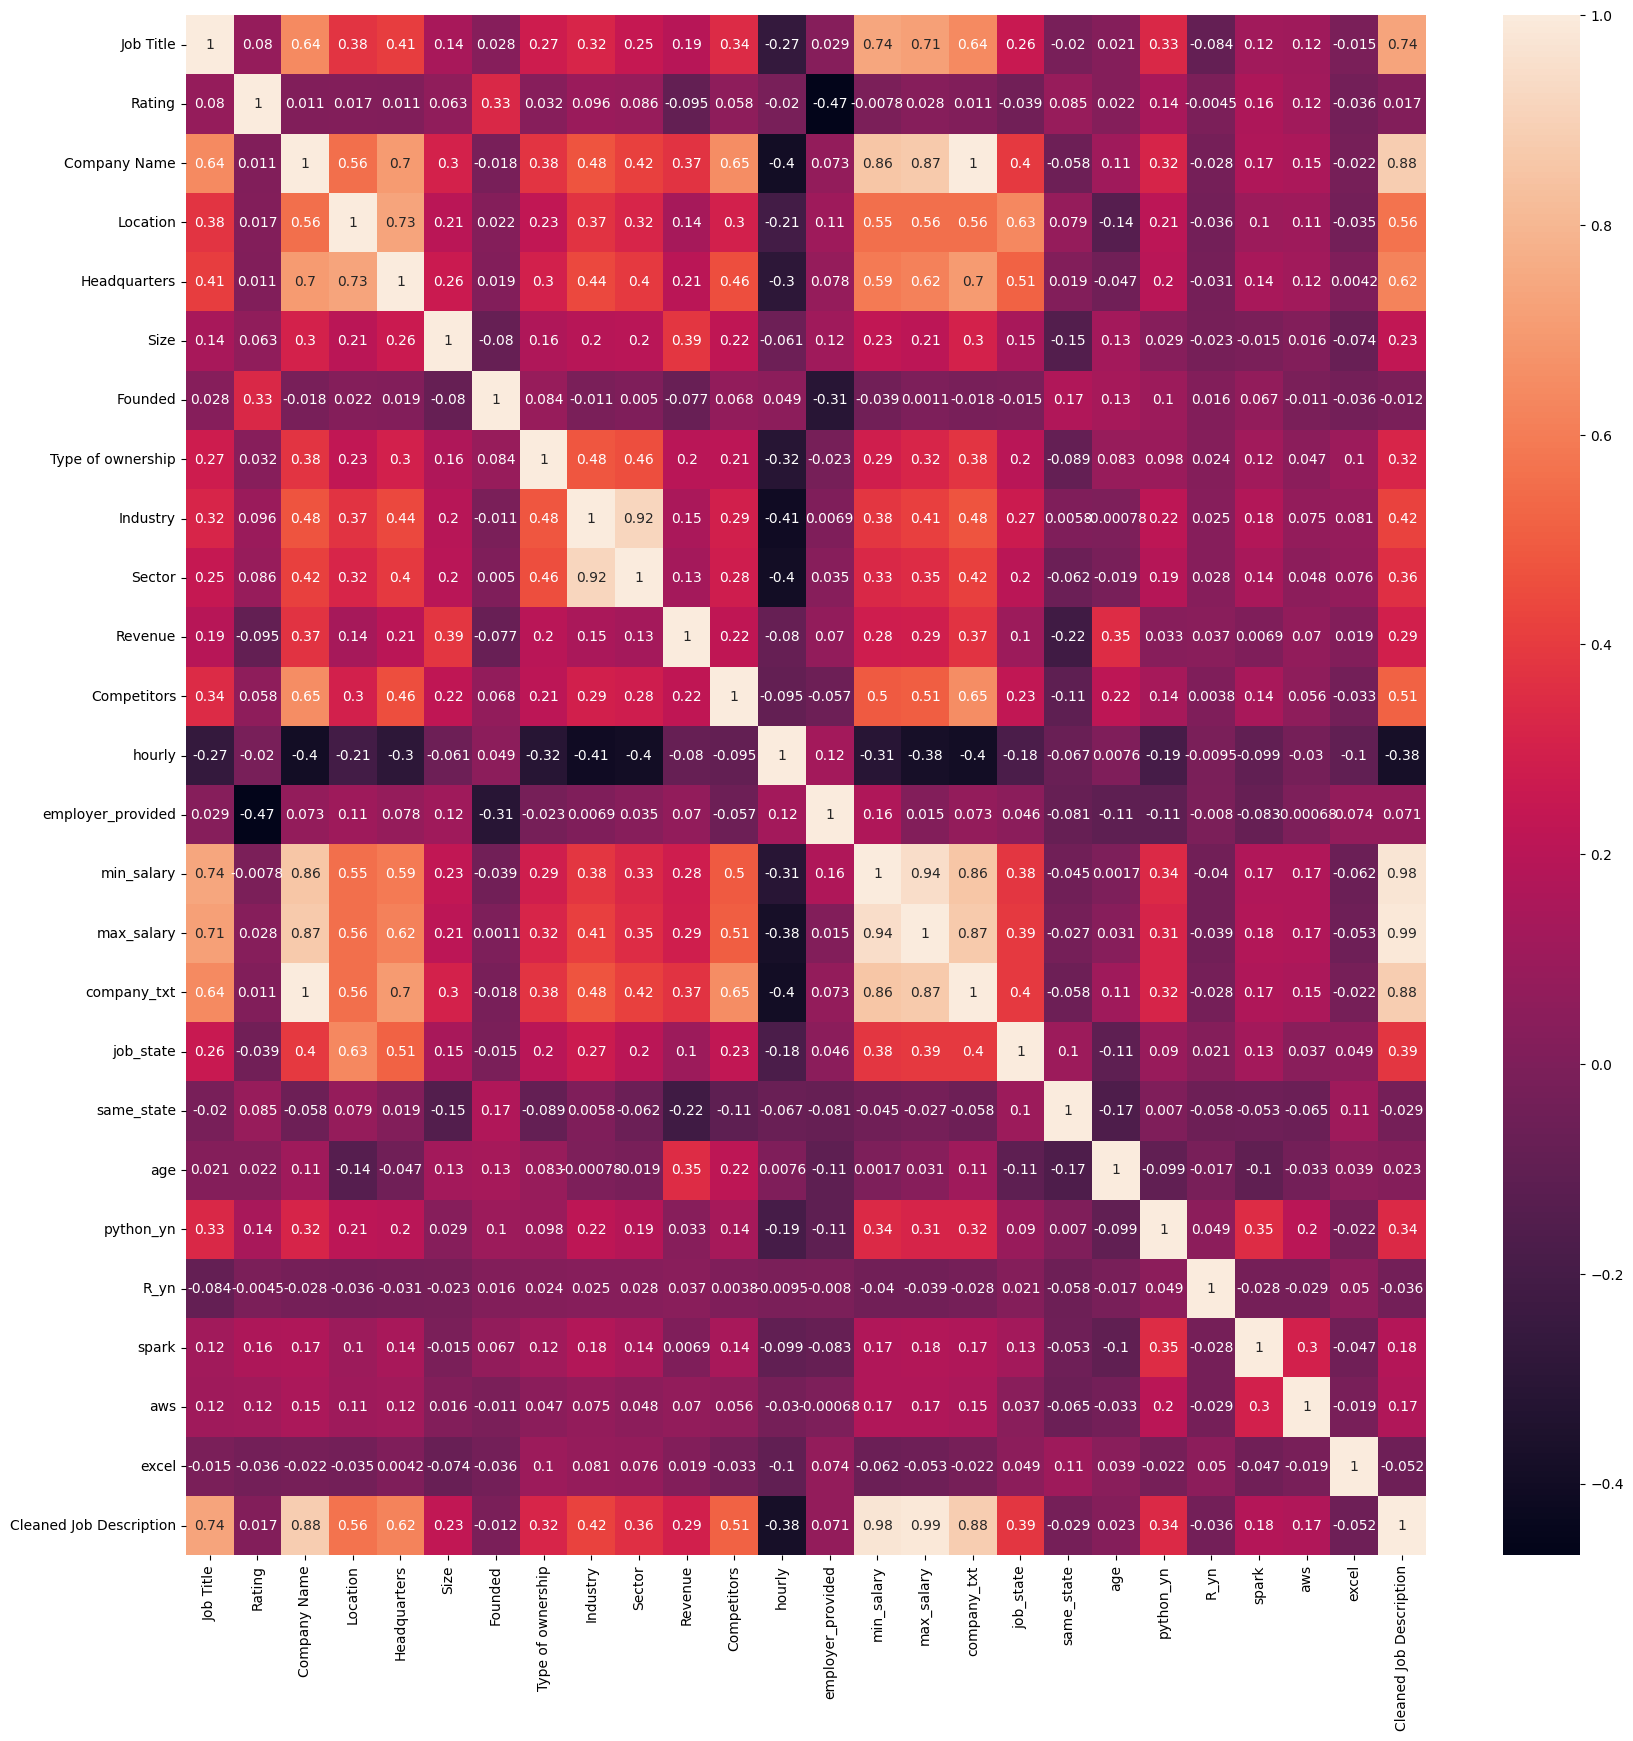

In [ ]:
# Check correlation between features
correlation = df_encoded.corr() 
plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation, annot=True)

In [ ]:
# drop highly correlated features (>=0.9): 
# Industry & Sector, min_salary & max_salary, Cleaned Job Description & min_salary, Cleaned Job Description & max_salary
df_encoded = df_encoded.drop(columns=['Industry', 'max_salary', 'min_salary'])

In [ ]:
combined_df = df_encoded
combined_df

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector,Revenue,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,Cleaned Job Description
0,106.179305,3.8,96.901524,96.564705,96.901524,90.753842,1973,101.776829,99.651233,100.569421,...,96.901524,96.564705,0,47,1,0,0,0,1,96.901524
1,98.918206,3.4,98.918206,98.918206,97.782204,112.230575,1984,97.053845,69.343702,95.497790,...,98.918206,97.953468,0,36,1,0,0,0,0,98.918206
2,106.179305,4.8,95.985349,95.985349,95.985349,90.753842,2010,101.776829,97.702355,83.168251,...,95.985349,91.395421,1,10,1,0,1,0,1,98.409445
3,106.179305,3.8,96.974859,94.177868,95.381099,92.916684,1965,94.462278,93.481831,87.320195,...,96.974859,96.722510,1,55,1,0,0,0,0,97.203710
4,106.179305,2.9,102.717572,103.062780,100.403309,111.344512,1998,101.776829,97.702355,104.310345,...,102.717572,98.663604,1,22,1,0,0,0,1,102.431134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,98.338519,3.9,98.421082,108.183579,98.421082,112.230575,1830,110.893782,111.766731,115.164880,...,98.421082,106.280148,0,190,0,0,0,1,0,98.338519
738,108.174439,4.4,100.168895,93.944492,123.243870,92.916684,2006,110.893782,113.191665,83.168251,...,100.168895,96.143020,0,14,1,0,1,1,0,100.891838
739,96.435984,2.6,102.757466,102.653781,102.757466,90.753842,1984,102.945170,100.690992,104.310345,...,102.757466,94.287934,1,36,0,0,0,0,1,96.435984
740,109.617020,3.2,104.545779,104.438115,104.545779,101.886778,-1,101.776829,97.702355,112.098537,...,104.545779,94.287934,0,-1,0,0,0,0,1,104.438115


# Linear Regression

In [ ]:
X = combined_df
y = salary['avg_salary']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Create a linear regression object
regressor = LinearRegression()

# Define the hyperparameters to search through
hyperparameters = {'fit_intercept': [True, False]}

# Create a grid search object with the defined hyperparameters
grid_search = GridSearchCV(regressor, hyperparameters, cv=5)
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print(grid_search.best_params_)

# Use the best hyperparameters to create a new model
best_regressor = LinearRegression(fit_intercept=True)

# Train the new model on the training data
best_regressor.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_regressor.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
# Predict the output values for new input data using the best model
y_test_pred = best_regressor.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
print("R2: {:.2f}".format(r2_score(y_test, y_test_pred)))

linear_reg_mse = mean_squared_error(y_test, y_test_pred)
linear_reg_r2 = r2_score(y_test, y_test_pred)

{'fit_intercept': True}
MSE: 9.74
R2: 0.99


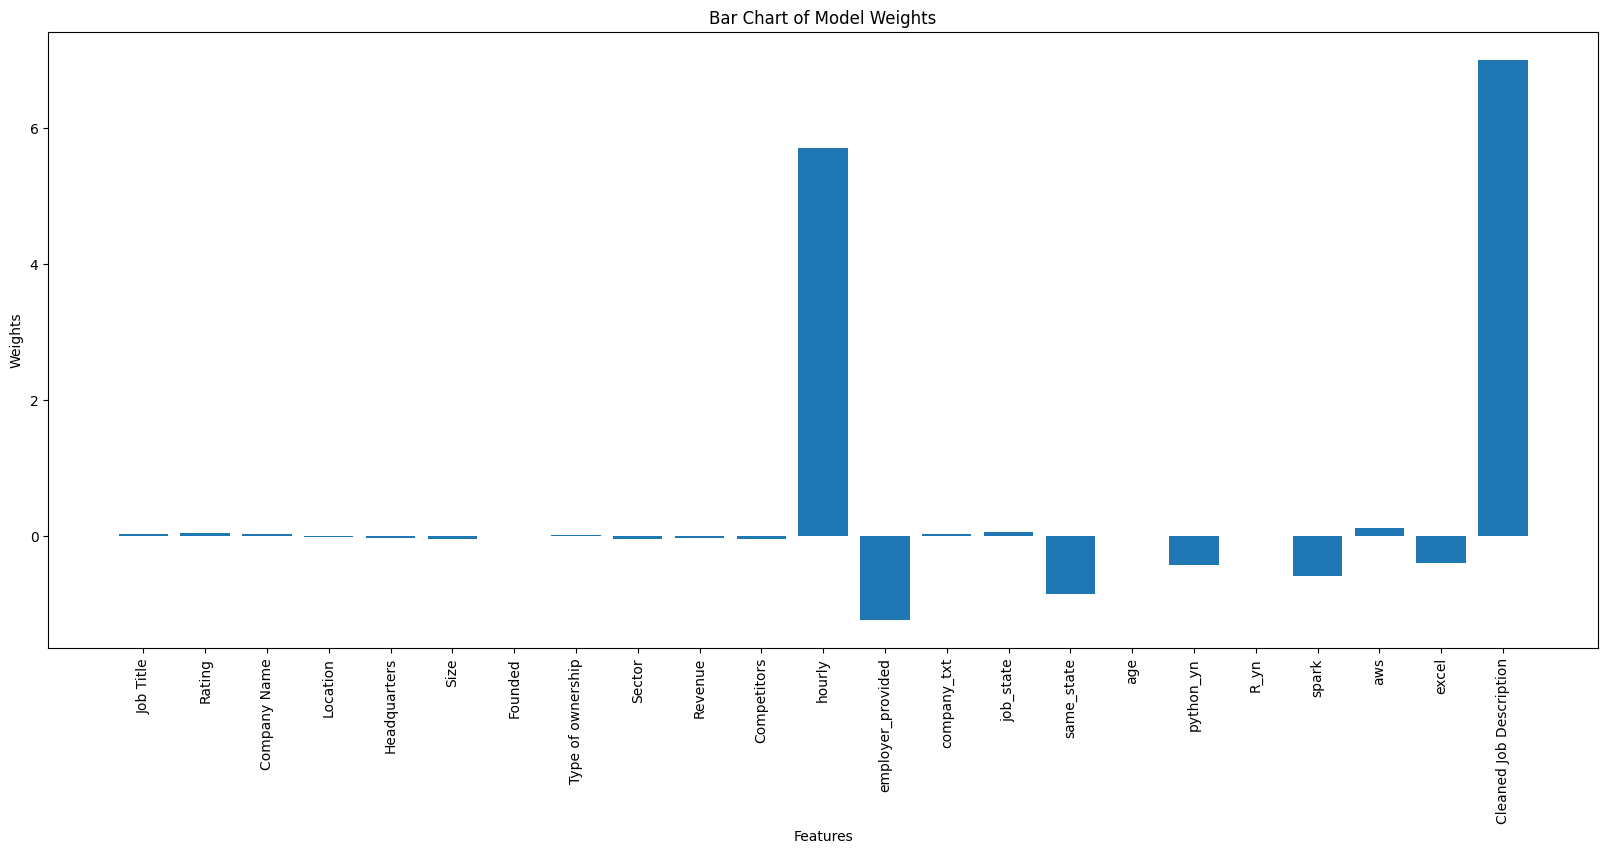

In [ ]:
# Feature importance
X_axis = X.columns.tolist()
plt.figure(figsize=(20, 8))
plt.bar(X_axis, best_regressor.coef_) 
plt.xlabel("Features")
plt.xticks(rotation=90) 
plt.ylabel("Weights")
plt.title("Bar Chart of Model Weights") 
plt.show()

# RandomForestRegressor

In [ ]:
X = combined_df
y = salary['avg_salary']

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the random forest model
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create a grid search object
rf_gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error")

# Fit the grid search object on the training data
rf_gs.fit(X_train, y_train)

# Use the best estimator from the grid search to make predictions on the testing data
y_pred = rf_gs.best_estimator_.predict(X_test)

# Calculate the MSE and R2 of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

MSE: 5.43
R2: 1.00


In [ ]:
rf_model = rf_gs.best_estimator_

In [ ]:
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 'Cleaned Job Description': 0.969185433204164
2. feature 'Company Name': 0.012491600219940368
3. feature 'company_txt': 0.009754492365209555
4. feature 'Job Title': 0.0023259387230471313
5. feature 'Competitors': 0.0010629742012289473
6. feature 'Location': 0.0006676213817591061
7. feature 'Headquarters': 0.0006250101993419402
8. feature 'hourly': 0.0006164880115591631
9. feature 'Founded': 0.0006138760596150153
10. feature 'job_state': 0.0005014575754608213
11. feature 'age': 0.0004214234961523451
12. feature 'Rating': 0.0003849048025290727
13. feature 'Sector': 0.00037875382220556655
14. feature 'Revenue': 0.0003006632922666826
15. feature 'Size': 0.00021708853789885457
16. feature 'excel': 0.000132048879555739
17. feature 'Type of ownership': 9.609129688826942e-05
18. feature 'aws': 8.994304528362677e-05
19. feature 'spark': 6.376202106768624e-05
20. feature 'same_state': 3.97660669610455e-05
21. feature 'python_yn': 2.3099521452661643e-05
22. feature 'emp

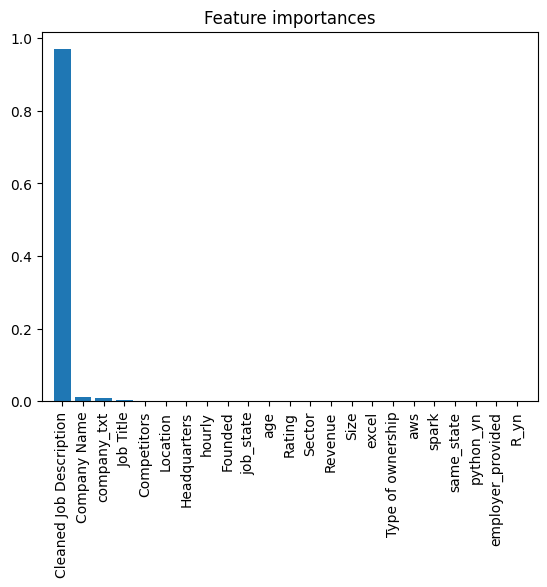

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns.values

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. feature '{feature_names[indices[f]]}': {importances[indices[f]]}")

# Plot the feature importances as a bar chart
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#Bayesian Linear Regression

In [ ]:
X = combined_df
y = salary['avg_salary'] 

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Define the parameter grid for the grid search
param_grid = {'n_iter': [100, 500, 1000],
              'alpha_1': [1e-6, 1e-5, 1e-4],
              'alpha_2': [1e-6, 1e-5, 1e-4],
              'lambda_1': [1e-6, 1e-5, 1e-4],
              'lambda_2': [1e-6, 1e-5, 1e-4]}

# Fit a Bayesian Linear Regression model
bayes_linear_reg = BayesianRidge()
grid_search = GridSearchCV(bayes_linear_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best estimator and score
best_bayes_linear_reg = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_
print("Score of best estimator: ", best_score)

# # Evaluate the model on the validation set
# bayes_linear_reg_score = bayes_linear_reg.score(X_val, y_val)

# # Predict the output values for new input data
# bayes_linear_reg_predicted_output = bayes_linear_reg.predict(X_test)

# print(bayes_linear_reg_score)

# Evaluate the model on the validation set
y_val_pred = best_bayes_linear_reg.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Validation MSE: {:.2f}".format(mse))
print("Validation R2: {:.2f}".format(r2))

# Predict the output values for new input data
y_test_pred = best_bayes_linear_reg.predict(X_test)

print("Test MSE: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
print("Test R2: {:.2f}".format(r2_score(y_test, y_test_pred)))

bayes_linear_reg_mse = mean_squared_error(y_test, y_test_pred)
bayes_linear_reg_r2 = r2_score(y_test, y_test_pred)

Score of best estimator:  -13.17734554836394
Validation MSE: 6.61
Validation R2: 1.00
Test MSE: 9.66
Test R2: 0.99


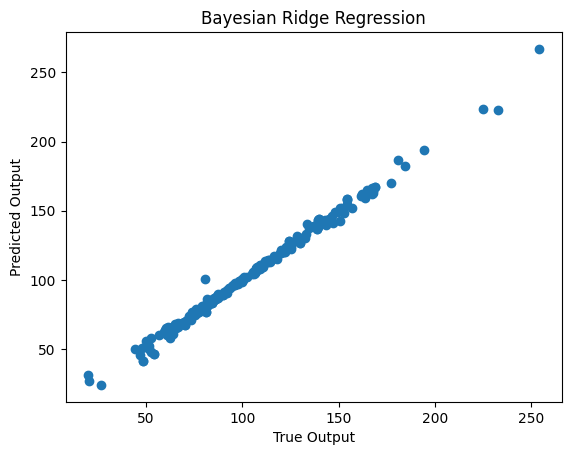

In [ ]:
# Scatter plot of predicted vs true output values
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('Bayesian Ridge Regression')
plt.show()

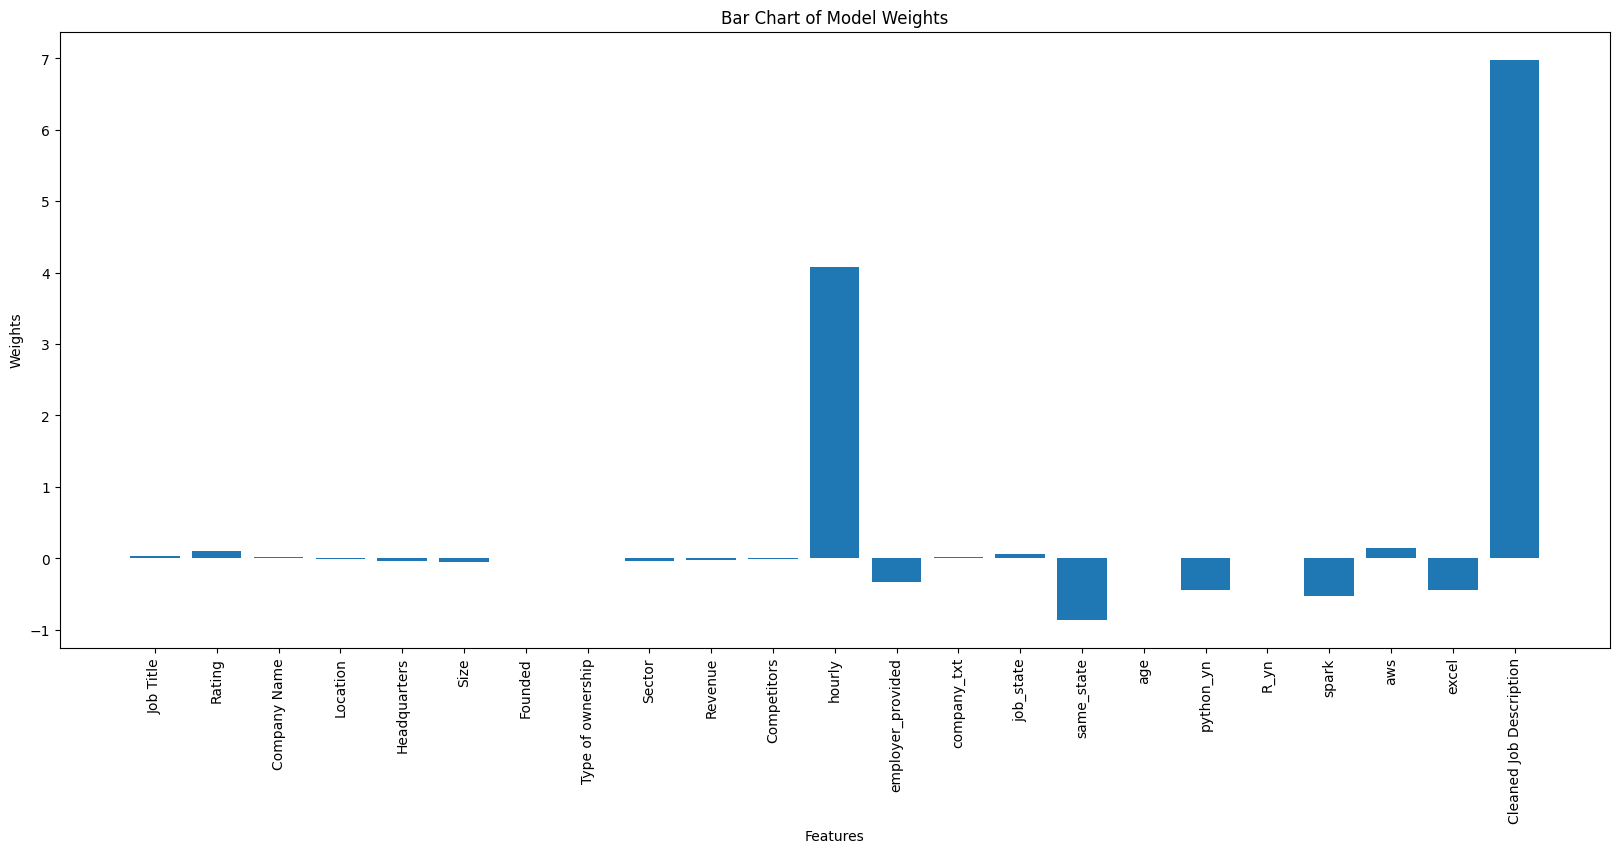

In [ ]:
# Feature importance
X_axis = X.columns.tolist()
plt.figure(figsize=(20, 8))
plt.bar(X_axis, best_bayes_linear_reg.coef_) 
plt.xlabel("Features")
plt.xticks(rotation=90) 
plt.ylabel("Weights")
plt.title("Bar Chart of Model Weights") 
plt.show()

#Polynomial Regression

In [ ]:
X = combined_df
y = salary['avg_salary']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline for polynomial regression
poly = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

# hyperparameters for the grid search
param_grid = {
    'poly_features__degree': [2, 3, 4],
    'lin_reg__fit_intercept': [True, False]
}

# grid search
grid_search = GridSearchCV(poly, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# best model from the grid search
best_model = grid_search.best_estimator_

# evaluate the model
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

poly_reg_mse = mean_squared_error(y_val, y_pred)
poly_reg_r2 = r2_score(y_val, y_pred)

MSE: 13.32
R2: 0.99


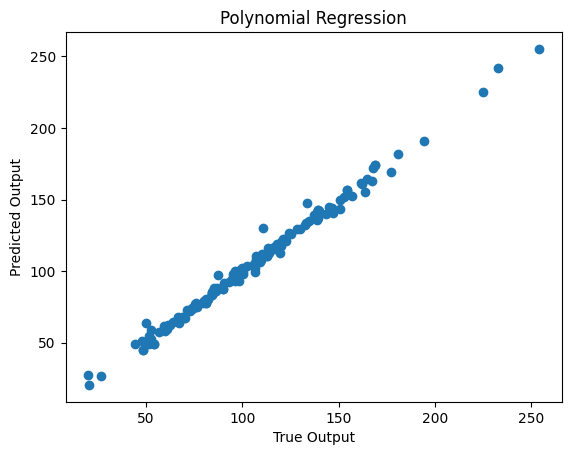

In [ ]:
plt.scatter(y_val, y_pred)
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the coefficients of the linear regression model
coef = best_model.named_steps['lin_reg'].coef_

# Get the names of the polynomial features
poly_feat_names = ['x^{}'.format(i) for i in range(1, best_model.named_steps['poly_features'].degree+1)]

# Get the feature importance
importance = np.abs(coef[:len(poly_feat_names)])

# Plot the feature importance
plt.bar(np.arange(len(importance)), importance)
plt.xticks(np.arange(len(importance)), poly_feat_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()



#Result

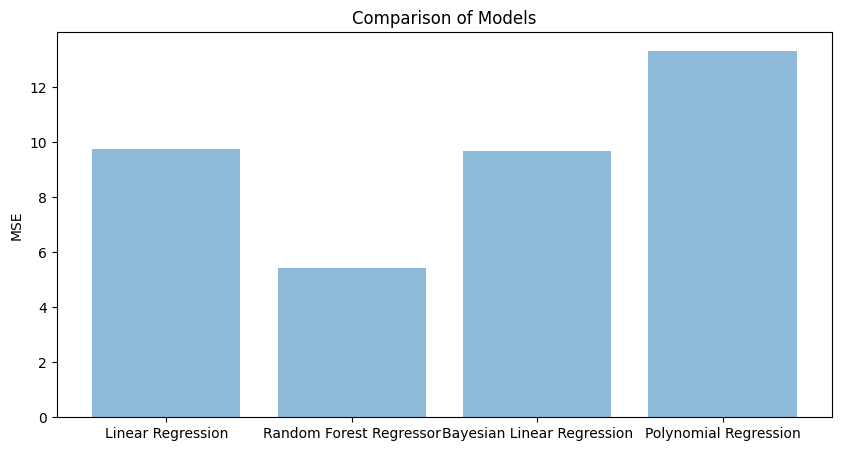

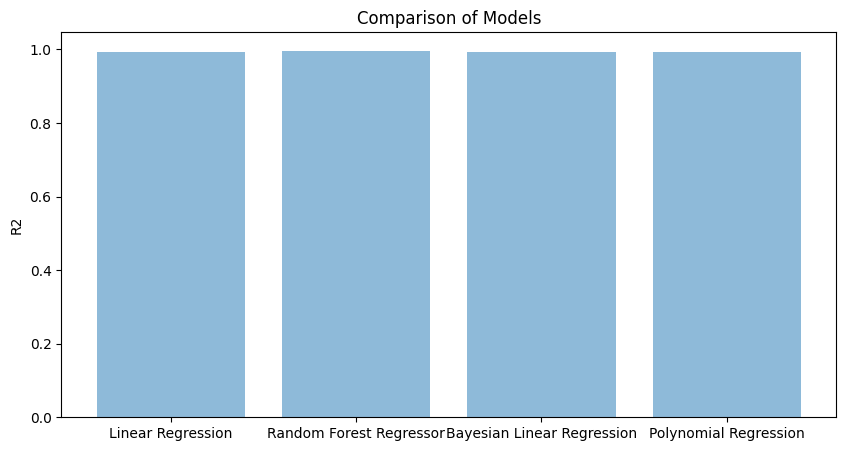

In [ ]:
# Bar plot of MSE and R2 values
mse_vals = [linear_reg_mse, rf_mse, bayes_linear_reg_mse, poly_reg_mse] # Replace with your MSE values
r2_vals = [linear_reg_r2, rf_r2, bayes_linear_reg_r2, poly_reg_r2] # Replace with your R2 values
model_names = ['Linear Regression', 'Random Forest Regressor', 'Bayesian Linear Regression', 'Polynomial Regression'] # Replace with your model names
x_pos = np.arange(len(model_names))

plt.figure(figsize=(10, 5))
plt.bar(x_pos, mse_vals, align='center', alpha=0.5)
plt.xticks(x_pos, model_names)
plt.ylabel('MSE')
plt.title('Comparison of Models')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(x_pos, r2_vals, align='center', alpha=0.5)
plt.xticks(x_pos, model_names)
plt.ylabel('R2')
plt.title('Comparison of Models')
plt.show()

# Vedangi --> experiments

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline for polynomial regression
poly = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

# hyperparameters for the grid search
param_grid = {
    'poly_features__degree': [2, 3, 4],
    'lin_reg__fit_intercept': [True, False]
}

# grid search
grid_search = GridSearchCV(poly, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# best model from the grid search
best_model = grid_search.best_estimator_

# evaluate the model
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE: {:.2f}".format(mse))
print("R2: {:.2f}".format(r2))

poly_reg_mse = mean_squared_error(y_val, y_pred)
poly_reg_r2 = r2_score(y_val, y_pred)

MSE: 13.32
R2: 0.99


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import csv

In [ ]:
df = pd.read_csv('salary_data_cleaned.csv')

In [ ]:
df.head()

In [ ]:
df['Job Title'].value_counts()